#📕📖 Algoritmos de Caminhamento em Grafos



##🖥️ Estrutura computacional para representação de Grafos


Ao representar Grafo $G=( V, E )$ em sua forma computacinal podemos adotar diferentes estuturas de dados, as mais comuns são:

*   Matriz de adjacência
*   Lista de Adjacência

### Matriz de adjacência

Na matriz de ajdacência cada elemento $a_{ij}$ de uma matriz $A$ manifesta a conexão entre o nó $i$ e $j$.

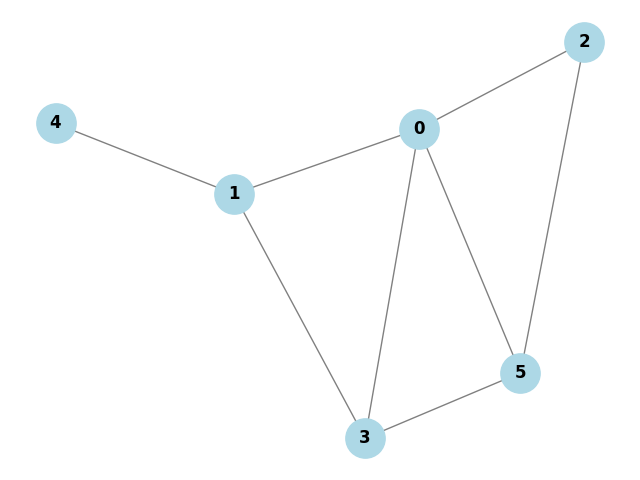

Para o grafo acima, a matriz de adjacência seria:

    G=[[0,1,1,1,0,1],
       [1,0,0,1,1,0],
       [1,0,0,0,0,1],
       [1,1,0,0,0,1],
       [0,1,0,0,0,0],
       [1,0,1,1,0,0]]

  * Para um grafo não direcionado, a matriz é sempre espelhada.
  * Teremos sempre $N^2$ elementos, independente do número de arestas.
  * Descobrir se $i$ é vizinho de $j$ é feito em $O(1)$
  * Descobrir quais são os vizinhos de $i$ é sempre feito em $O(N)$
  * Destruir/construir uma aresta é feito em $O(1)$

### Lista de adjacência

Armazenamos em uma estrutura (listas, dicionários, etc.) as listas de vizinhos de cada nó. Para o grafo de exemplo temos:

    G={0:[1,2,3,5,2],
       1:[0,3,4],
       2:[0,5],
       3:[0,4,5],
       4:[1],
       5:[0,2,3]
       }

* Em um grafo não direcionado, teremos sempre 2E elementos
* Descobrir se $i$ é vizinho de $j$ é feito em $O(E)$
* Descobrir quais são os vizinhos de $i$ é feito em $O(E)$
* Destruir/construir uma aresta é feito em $O(N)$


Se usarmos dicionários na estrutura interna, alguma operações podem ser melhoradas, entretanto existem alguns custos associados a como a linguagem rodará isso "por baixo dos panos"

      G={0:{1:1,2:1,3:1,5:1,2:1},
          1:{0:1,3:,4:1},
          2:{0:1,5:1},
          3:{0:1,4:1,5:1},
          4:{1:1},
          5:{0:1,2:1,3:1}
          }


## 🖥️ Representação para digrafos e grafos valorados

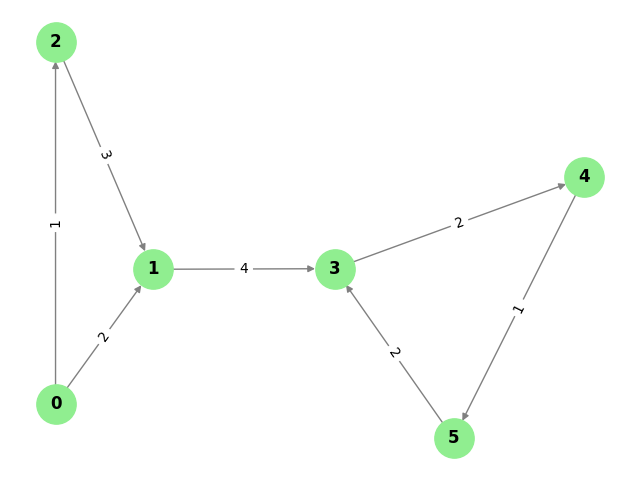

In [25]:
#Grafo representado por matriz de adjacência
G=[[0,2,1,0,0,0],
   [0,0,4,0,0,0],
   [0,3,0,0,0,0],
   [0,0,0,0,2,0],
   [0,0,0,0,0,1],
   [0,0,0,2,0,0]]

#Exibir vizinhos de 0 e peso da aresta
for v,w in enumerate(G[0]):
  if w>0:
    print(f'0->{v}: {w}')

0->1: 2
0->2: 1


In [26]:
  #Grafo representado por lista de adjacência
G={0:{1:2,2:1},
   1:{3:4},
   2:{1:3},
   3:{4:2},
   4:{5:1},
   5:{3:2}}

#Exibir vizinhos de 0 e peso da aresta
for v,w in G[0].items():
  if w>0:
    print(f'0->{v}: {w}')


0->1: 2
0->2: 1


#📈👁️‍🗨️ Visuzalizando Grafos com networkx

In [27]:
!pip install networkx matplotlib

In [28]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

## Grafos simples

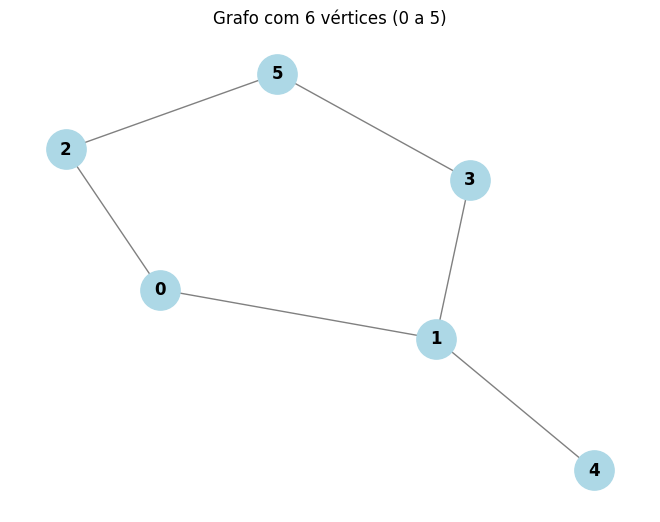

In [29]:
# Criação do grafo
G = nx.Graph()

# Adiciona os vértices (0 a 5)
G.add_nodes_from(range(6))

# Adiciona algumas arestas com formato (origem,destino)
arestas = [(0, 1), (0, 2), (1, 3), (1, 4), (2, 5), (3, 5)]
G.add_edges_from(arestas)

# Desenha o grafo
pos = nx.spring_layout(G)  # Layout para melhor visualização
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=800, font_weight='bold', edge_color='gray')
plt.title("Grafo com 6 vértices (0 a 5)")
plt.show()

## Digrafos

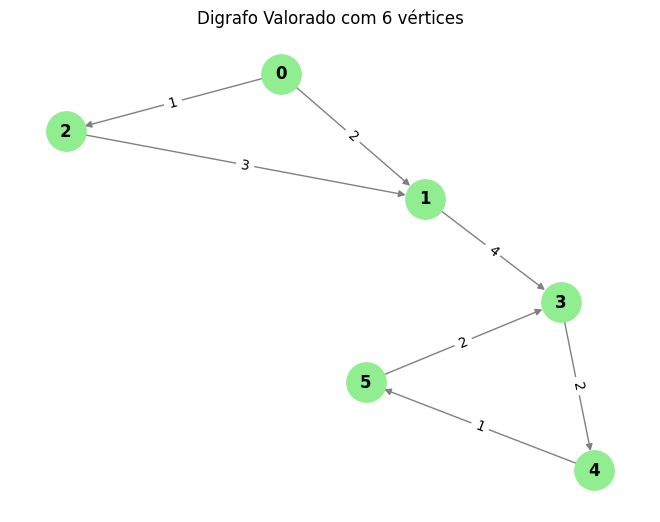

In [30]:
# Criação de um dígrafo (grafo direcionado)
G = nx.DiGraph()

# Adiciona os vértices de 0 a 5
G.add_nodes_from(range(6))

# Adiciona arestas com formato: (origem, destino, peso))
arestas = [
    (0, 1, 2),
    (0, 2, 1),
    (1, 3, 4),
    (2, 1, 3),
    (3, 4, 2),
    (4, 5, 1),
    (5, 3, 2)
]
G.add_weighted_edges_from(arestas)

# Define layout para visualização
pos = nx.spring_layout(G)

# Desenha os nós e arestas
nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=800, font_weight='bold', edge_color='gray', arrows=True)

# Desenha os rótulos com os pesos
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.title("Digrafo Valorado com 6 vértices")
plt.show()

In [31]:
print(pos)

{0: array([-0.17077668,  0.88283859]), 1: array([0.07239137, 0.28983549]), 2: array([-0.53272524,  0.60951891]), 3: array([ 0.30068304, -0.20046973]), 4: array([ 0.35773306, -1.        ]), 5: array([-0.02730555, -0.58172326])}


## Animação

In [32]:
import matplotlib.animation as animation

def adj_para_gnetworkx(grafo:dict[int:list]):
  G = nx.Graph()
  G.add_nodes_from(grafo.keys())
  arestas=[]
  for w in grafo.keys():
      for v in grafo[w]:
          arestas.append((w,v))
  G.add_edges_from(arestas)
  return G


def criar_animacao(grafo:dict, sequencia,name='Fig',pos=None):
    '''
    sequência: ordem de nós a serem pintados
    name: nome da figura que será salva
    pos: coordenadas dos pontos
    '''

    G=adj_para_gnetworkx(grafo)

    if not pos:
        pos = nx.spring_layout(G)
    print(pos)

    cores_nos = ['lightgray'] * len(G.nodes)

    def update(frame):
        plt.cla()
        for i in range(frame + 1):
            if i < len(sequencia):
                cores_nos[sequencia[i]] = 'orange'
        nx.draw(G, pos, with_labels=True, node_color=cores_nos,
                node_size=800, font_weight='bold', edge_color='gray', arrows=True)
        plt.title("Animação de Visitação")

    fig = plt.figure()
    ani = animation.FuncAnimation(fig, update, frames=len(sequencia), interval=1000, repeat=False)
    ani.save(f"{name}.gif", writer='pillow')

#🚶‍➡️🔦Busca em profundiade (DFS)

In [54]:
def dfs(G:dict[int:list],origem:int,visitados=[]):
    sequencia=[origem]

    if not visitados:
        visitados=[False]*len(G.keys())

    visitados[origem]=True
    for v in G[origem]:
        if not visitados[v]:
            sequencia+=dfs(G,v,visitados)

    return sequencia

[0, 1, 3, 7, 4, 5, 2, 6, 8]
{0: array([0, 0]), 1: array([-1. , -0.5]), 2: array([ 1. , -0.5]), 3: array([-1.5, -1. ]), 4: array([-0.5, -1. ]), 5: array([ 0.5, -1. ]), 6: array([ 1.5, -1. ]), 7: array([ 0. , -1.5]), 8: array([-2. , -1.5])}


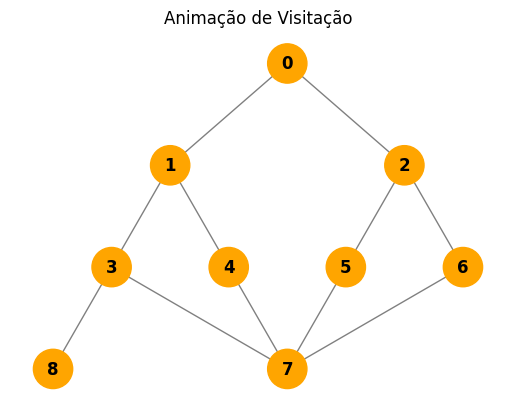

In [34]:
grafo = {
  0: [1,2],
  1: [0,3,4],
  2: [0,5,6],
  3: [1,7,8],
  4: [1,7],
  5: [2,7],
  6: [2,7],
  7: [3,4,5,6],
  8: [3]
}

sequencia=dfs(grafo,0)
print(sequencia)
pos={0: np.array([0, 0]),
     1: np.array([-1,  -0.5]),
     2: np.array([1, -0.5]),
     3: np.array([-1.5 , -1]),
     4: np.array([-0.5, -1]),
     5: np.array([ 0.5, -1]),
     6: np.array([ 1.5, -1]),
     7: np.array([ 0, -1.5]),
     8: np.array([-2, -1.5])}
criar_animacao(grafo,sequencia, name='Exemplo_dfs', pos=pos)

###TAREFA!

Utilizar a implementação da DFS que já foi dada para identificar componentes conexas dos grafos a seguir:

In [55]:
def identifica_componentes(grafo:dict):
    visited = [False] * len(grafo.keys())
    componentes = []

    for no in grafo.keys():
        if not visited[no]:
            componentes.append(dfs(grafo, no, visited))

    for elem in componentes:
        print(elem)

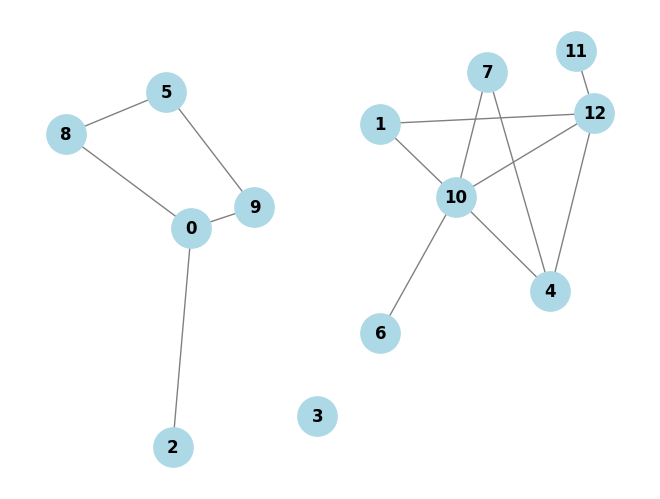

[0, 2, 8, 5, 9]
[1, 10, 4, 12, 11, 7, 6]
[3]


In [56]:
#Grafo de exemplo 1:
grafo1={0: [2, 8, 9],1: [ 10, 12],     2: [0],3: [],4: [12,7], 5: [8, ],     6: [10], 7: [4, 10],     8: [0, 5], 9: [0,5],   10: [1, 4, 6, 7, 12],  11: [12],     12: [1, 4, 10, 11]}
pos1 = {0: np.array([-0.1,  0.38]),       1: np.array([ 0.2, 0.48]),       2: np.array([-0.13,  0.17]),       3: np.array([0.1, 0.2]),       4: np.array([ 0.47, 0.32]),     5: np.array([-0.14,  0.51]),       6: np.array([ 0.2 , 0.28]),7: np.array([ 0.37, 0.53]),8: np.array([-0.3,  0.47]),       9: np.array([0,  0.4 ]),       10: np.array([ 0.32, 0.41]),       11: np.array([ 0.51, 0.55]),       12: np.array([ 0.54, 0.49])}

G1=adj_para_gnetworkx(grafo1)
nx.draw(G1, pos1, with_labels=True, node_color='lightblue', node_size=800, font_weight='bold', edge_color='gray')
plt.show()

identifica_componentes(grafo1)

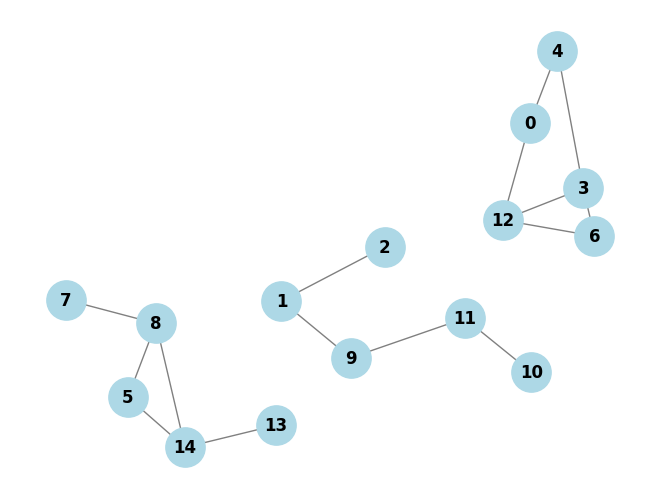

[0, 4, 3, 6, 12]
[1, 2, 9, 11, 10]
[5, 8, 7, 14, 13]


In [40]:
#Grafo de exemplo 2: [1, 10, 12, 4, 6, 7, 11]
grafo2={0: [4, 12], 1: [2, 9], 2: [1], 3: [6, 12, 4], 4: [0, 3], 5: [8, 14], 6: [3, 12], 7: [8], 8: [5, 7, 14], 9: [1, 11], 10: [11], 11: [9, 10], 12: [0, 3, 6], 13: [14], 14: [5, 13, 8]}
pos2 = {0: np.array([0.51149361, 0.66679801]), 1: np.array([-0.29696106, -0.05849596]), 2: np.array([0.03855279, 0.16127751]), 3: np.array([0.68523718, 0.40029861]), 4: np.array([0.60151311, 0.96225755]), 5: np.array([-0.79695508, -0.45181643]), 6: np.array([0.72192848, 0.205464  ]), 7: np.array([-1.        , -0.05335286]), 8: np.array([-0.70546385, -0.15082198]), 9: np.array([-0.07213045, -0.29096604]), 10: np.array([ 0.51629567, -0.34988598]), 11: np.array([ 0.2993946 , -0.12977451]), 12: np.array([0.42295758, 0.27096485]), 13: np.array([-0.31492735, -0.56578282]), 14: np.array([-0.61093523, -0.65616393])}

G2=adj_para_gnetworkx(grafo2)
nx.draw(G2, pos2, with_labels=True, node_color='lightblue', node_size=800, font_weight='bold', edge_color='gray')
plt.show()

identifica_componentes(grafo2)

###TAREFA!

Implemente a busca em profundidade, mas agora utilizando matriz de adijacência. Para isso também implemente uma função que transforme a listas de adjacência anteriores nas matrizes. Por fim, compare as saídas anteriores com as novas.

In [58]:
def converte_adj_matriz(lista_adj):
    num_vertices = len(lista_adj)
    matriz = [[0] * num_vertices for _ in range(num_vertices)]
    for u, vizinhos in lista_adj.items():
        for v in vizinhos:
            matriz[u][v] = 1
    return matriz

def dfs_matriz(matriz:list[list],origem,visitados=[]):
    if visitados is None or visitados == []:
        visitados = [False] * len(matriz)

    sequencia = [origem]
    visitados[origem] = True

    for v, conectado in enumerate(matriz[origem]):
        if conectado and not visitados[v]:
            sequencia += dfs_matriz(matriz, v, visitados)

    return sequencia


In [59]:
grafo1_m=converte_adj_matriz(grafo1)
dfs_matriz(grafo1_m,1)

[1, 10, 4, 7, 12, 11, 6]

In [48]:
grafo2_m=converte_adj_matriz(grafo1)
dfs_matriz(grafo2_m,5)

[5, 8, 0, 2, 9]

#🚶‍➡️🔦Busca em largura

In [61]:
from collections import deque

def bfs(G,origem:int):
    # Pego o maior valor entre a qtd de keys e a qtd de adjascencias
    visitados = [False] * (max(max(G.keys()), max(v for adj in G.values() for v in adj)) + 1)
    ordem = []
    fila = deque([origem])

    visitados[origem] = True

    while fila:
        atual = fila.popleft()
        ordem.append(atual)

        for vizinho in G.get(atual, []):
            if not visitados[vizinho]:
                fila.append(vizinho)
                visitados[vizinho] = True

    return ordem


bfs(grafo1,1)

[1, 10, 12, 4, 6, 7, 11]